# Laboratorium 5:  Aproksymacja
Jakub Fabia

## Importowanie bibliotek

Importuję niezbędne biblioteki. Biblioteki te obejmują:
- `CSV` do pracy z plikami CSV,
- `DataFrames` do manipulacji danymi w formie tabelarycznej,
- `Plots` do tworzenia wykresów,
- `Statistics` do obliczeń statystycznych,
- `TaylorSeries` do przybliżania funkcji szeregiem Taylora,
- `Polynomials` do pracy z wielomianami i ich dopasowywania.

In [1]:
using DataFrames
using Plots
using Statistics
using CSV
using Polynomials
using TaylorSeries

## Zadanie 1/2

In [2]:
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [3]:
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [4]:
function benchmark_functions(sizes, num_trials)
    open("app/Lab5/Assignment/resultsJulia.csv", "w") do file
        CSV.write(file, [], writeheader=true, header=["size", "sample", "time_naive", "time_better", "time_blas"])
        for n in sizes
            for i in -1:num_trials-1
                
                A = rand(n, n)
                B = rand(n, n)
                
                time_naive = @elapsed naive_multiplication(A,B);
                time_better = @elapsed better_multiplication(A, B);
                time_blas = @elapsed A*B;

                # Skip the first sample, as it measures the compilation time
                if i != -1
                    CSV.write(file, [(n, i, time_naive, time_better, time_blas)], append=true)
                end
            end
        end
    end
end

benchmark_functions (generic function with 1 method)

In [5]:
sizes = 10:50:1010
benchmark_functions(sizes, 10)

Kodu w C nie będę tutaj wstawiał, wyniki jego działania zapisuje do pliku CSV w takim samym formacie jak ten wygenerowany przez komórkę powyżej.

In [6]:
input = "app/Lab5/Assignment/resultsJulia.csv"
dfJulia = CSV.read(input, delim=",", DataFrame)
input = "app/Lab5/Assignment/resultsO0.csv"
dfO0 = CSV.read(input, delim=",", DataFrame)
input = "app/Lab5/Assignment/resultsO1.csv"
dfO1 = CSV.read(input, delim=",", DataFrame)
input = "app/Lab5/Assignment/resultsO2.csv"
dfO2 = CSV.read(input, delim=",", DataFrame)
input = "app/Lab5/Assignment/resultsO3.csv"
dfO3 = CSV.read(input, delim=",", DataFrame)
input = "app/Lab5/Assignment/resultsO4.csv"
dfO4 = CSV.read(input, delim=",", DataFrame)

210×5 DataFrame
 Row │ size   sample  time_naive  time_better  time_blas
     │ Int64  Int64   Float64     Float64      Float64
─────┼───────────────────────────────────────────────────
   1 │    10       0        0.0          0.0        0.0
   2 │    10       1        0.0          0.0        0.0
   3 │    10       2        0.0          0.0        0.0
   4 │    10       3        0.0          0.0        0.0
   5 │    10       4        0.0          0.0        0.0
   6 │    10       5        0.0          0.0        0.0
   7 │    10       6        0.0          0.0        0.0
   8 │    10       7        0.0          0.0        0.0
   9 │    10       8        0.0          0.0        0.0
  10 │    10       9        0.0          0.0        0.0
  11 │    60       0        0.0          0.0        0.0
  ⋮  │   ⋮      ⋮         ⋮            ⋮           ⋮
 201 │  1010       0        0.83         0.31       0.51
 202 │  1010       1        0.83         0.34       0.52
 203 │  1010       2        0.85         0.32       0.52
 204 │  1010       3        0.81         0.38       0.51
 205 │  1010       4        0.86         0.31       0.52
 206 │  1010       5        0.82         0.33       0.51
 207 │  1010       6        0.82         0.32       0.51
 208 │  1010       7        0.82         0.35       0.52
 209 │  1010       8        0.81         0.33       0.51
 210 │  1010       9        0.82         0.32       0.51
                                         189 rows omitted

In [7]:
plot_dfJulia = combine(
    groupby(dfJulia, :"size"), 
    "time_naive" => mean, 
    "time_naive" => std, 
    "time_better" => mean, 
    "time_better" => std,
    "time_blas" => mean, 
    "time_blas" => std
)
plot_dfO0 = combine(
    groupby(dfO0, :"size"), 
    "time_naive" => mean, 
    "time_naive" => std, 
    "time_better" => mean, 
    "time_better" => std,
    "time_blas" => mean, 
    "time_blas" => std
)
plot_dfO1 = combine(
    groupby(dfO1, :"size"), 
    "time_naive" => mean, 
    "time_naive" => std, 
    "time_better" => mean, 
    "time_better" => std,
    "time_blas" => mean, 
    "time_blas" => std
)
plot_dfO2 = combine(
    groupby(dfO2, :"size"), 
    "time_naive" => mean, 
    "time_naive" => std, 
    "time_better" => mean, 
    "time_better" => std,
    "time_blas" => mean, 
    "time_blas" => std
)
plot_dfO3 = combine(
    groupby(dfO3, :"size"), 
    "time_naive" => mean, 
    "time_naive" => std, 
    "time_better" => mean, 
    "time_better" => std,
    "time_blas" => mean, 
    "time_blas" => std
)
plot_dfO4 = combine(
    groupby(dfO4, :"size"), 
    "time_naive" => mean, 
    "time_naive" => std, 
    "time_better" => mean, 
    "time_better" => std,
    "time_blas" => mean, 
    "time_blas" => std
)

21×7 DataFrame
 Row │ size   time_naive_mean  time_naive_std  time_better_mean  time_better_s ⋯
     │ Int64  Float64          Float64         Float64           Float64       ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    10            0.0        0.0                    0.0        0.0       ⋯
   2 │    60            0.0        0.0                    0.0        0.0
   3 │   110            0.001      0.00316228             0.0        0.0
   4 │   160            0.003      0.00483046             0.0        0.0
   5 │   210            0.006      0.00516398             0.002      0.0042163 ⋯
   6 │   260            0.014      0.00699206             0.006      0.0051639
   7 │   310            0.022      0.00632456             0.01       0.0047140
   8 │   360            0.033      0.00948683             0.01       1.82856e-
   9 │   410            0.051      0.00737865             0.02       0.0081649 ⋯
  10 │   460            0.076      0.00966092             0.03       0.0081649
  11 │   510            0.72       0.0194365              0.037      0.0094868
  12 │   560            0.128      0.00421637             0.047      0.0048304
  13 │   610            0.171      0.0152388              0.065      0.0097182 ⋯
  14 │   660            1.166      0.0279682              0.088      0.010328
  15 │   710            0.267      0.0105935              0.105      0.0084983
  16 │   760            0.346      0.0177639              0.125      0.0052704
  17 │   810            0.426      0.0189737              0.159      0.011005  ⋯
  18 │   860            0.53       0.0305505              0.197      0.0141814
  19 │   910            0.596      0.021187               0.253      0.0286938
  20 │   960            0.724      0.0150555              0.269      0.0119722
  21 │  1010            0.827      0.0163639              0.331      0.0213177 ⋯
                                                               3 columns omitted

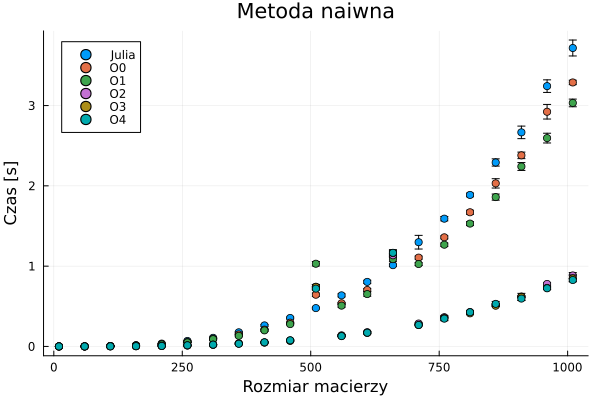

In [8]:
p1 = scatter(
    plot_dfJulia.size, 
    plot_dfJulia.time_naive_mean, 
    yerr = plot_dfJulia.time_naive_std,
    xlabel = "Rozmiar macierzy", 
    ylabel = "Czas [s]", 
    title = "Metoda naiwna", 
    label="Julia"
)
scatter!(
    plot_dfO0.size, 
    plot_dfO0.time_naive_mean, 
    yerr = plot_dfO0.time_naive_std,
    label="O0"
)
scatter!(
    plot_dfO1.size, 
    plot_dfO1.time_naive_mean, 
    yerr = plot_dfO1.time_naive_std,
    label="O1"
)
scatter!(
    plot_dfO2.size, 
    plot_dfO2.time_naive_mean, 
    yerr = plot_dfO2.time_naive_std,
    label="O2"
)
scatter!(
    plot_dfO3.size, 
    plot_dfO3.time_naive_mean, 
    yerr = plot_dfO3.time_naive_std,
    label="O3"
)
scatter!(
    plot_dfO4.size, 
    plot_dfO4.time_naive_mean, 
    yerr = plot_dfO4.time_naive_std,
    label="O4"
)

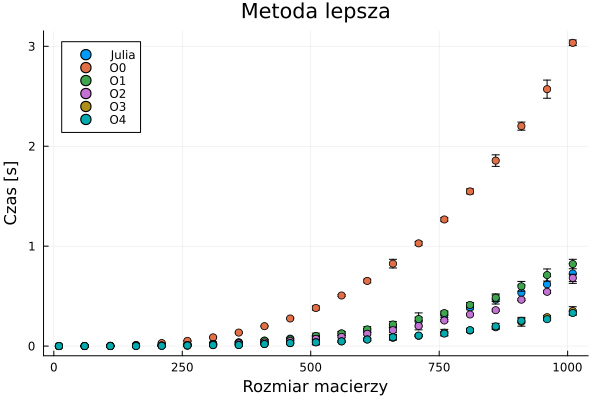

In [9]:
p1 = scatter(
    plot_dfJulia.size, 
    plot_dfJulia.time_better_mean, 
    yerr = plot_dfJulia.time_naive_std,
    xlabel = "Rozmiar macierzy", 
    ylabel = "Czas [s]", 
    title = "Metoda lepsza", 
    label="Julia"
)
scatter!(
    plot_dfO0.size, 
    plot_dfO0.time_better_mean, 
    yerr = plot_dfO0.time_naive_std,
    label="O0"
)
scatter!(
    plot_dfO1.size, 
    plot_dfO1.time_better_mean, 
    yerr = plot_dfO1.time_naive_std,
    label="O1"
)
scatter!(
    plot_dfO2.size, 
    plot_dfO2.time_better_mean, 
    yerr = plot_dfO2.time_naive_std,
    label="O2"
)
scatter!(
    plot_dfO3.size, 
    plot_dfO3.time_better_mean, 
    yerr = plot_dfO3.time_naive_std,
    label="O3"
)
scatter!(
    plot_dfO4.size, 
    plot_dfO4.time_better_mean, 
    yerr = plot_dfO4.time_naive_std,
    label="O4"
)

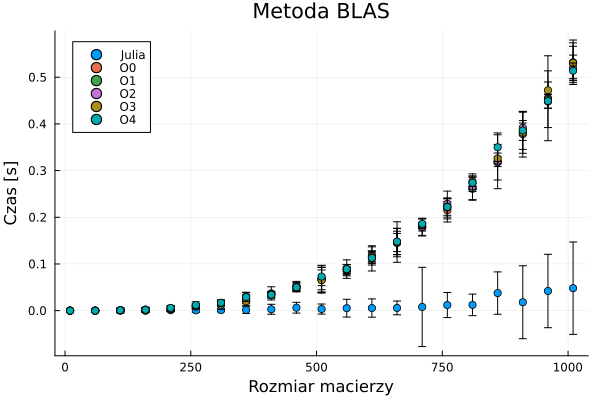

In [10]:
p1 = scatter(
    plot_dfJulia.size, 
    plot_dfJulia.time_blas_mean, 
    yerr = plot_dfJulia.time_naive_std,
    xlabel = "Rozmiar macierzy", 
    ylabel = "Czas [s]", 
    title = "Metoda BLAS", 
    label="Julia"
)
scatter!(
    plot_dfO0.size, 
    plot_dfO0.time_blas_mean, 
    yerr = plot_dfO0.time_naive_std,
    label="O0"
)
scatter!(
    plot_dfO1.size, 
    plot_dfO1.time_blas_mean, 
    yerr = plot_dfO1.time_naive_std,
    label="O1"
)
scatter!(
    plot_dfO2.size, 
    plot_dfO2.time_blas_mean, 
    yerr = plot_dfO2.time_naive_std,
    label="O2"
)
scatter!(
    plot_dfO3.size, 
    plot_dfO3.time_blas_mean, 
    yerr = plot_dfO3.time_naive_std,
    label="O3"
)
scatter!(
    plot_dfO4.size, 
    plot_dfO4.time_blas_mean, 
    yerr = plot_dfO4.time_naive_std,
    label="O4"
)

## Zadnie 3

Do metody naiwnej i lepszej dpoasowuje wielomiany 3 stopnia (zgodnie z ilością forów).
W źródłach znalazłem, że algorytm blas ma złożoność powyżej n^2.7 jednak BLAS wykorzystuje wielowątkowość, więc zakładam, że jego złożoność jest bliżej n^2.

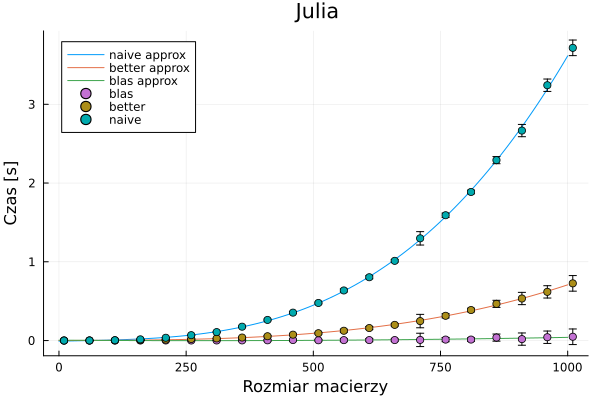

In [11]:
fit1 = fit(plot_dfJulia.size, plot_dfJulia.time_naive_mean, 3)
fit2 = fit(plot_dfJulia.size, plot_dfJulia.time_better_mean, 3)
fit3 = fit(plot_dfJulia.size, plot_dfJulia.time_blas_mean, 2)
xs = 0:1:1000
plot(fit1,extrema(xs)...,label="naive approx", xlabel = "Rozmiar macierzy", ylabel = "Czas [s]", title = "Julia")
plot!(fit2,extrema(xs)...,label="better approx")
plot!(fit3,extrema(xs)...,label="blas approx")
scatter!(
    plot_dfJulia.size, 
    plot_dfJulia.time_blas_mean, 
    yerr = plot_dfJulia.time_naive_std,
    label = "blas")
scatter!(
    plot_dfJulia.size, 
    plot_dfJulia.time_better_mean, 
    yerr = plot_dfJulia.time_naive_std,
    label = "better")
scatter!(
    plot_dfJulia.size, 
    plot_dfJulia.time_naive_mean, 
    yerr = plot_dfJulia.time_naive_std,
    label = "naive")

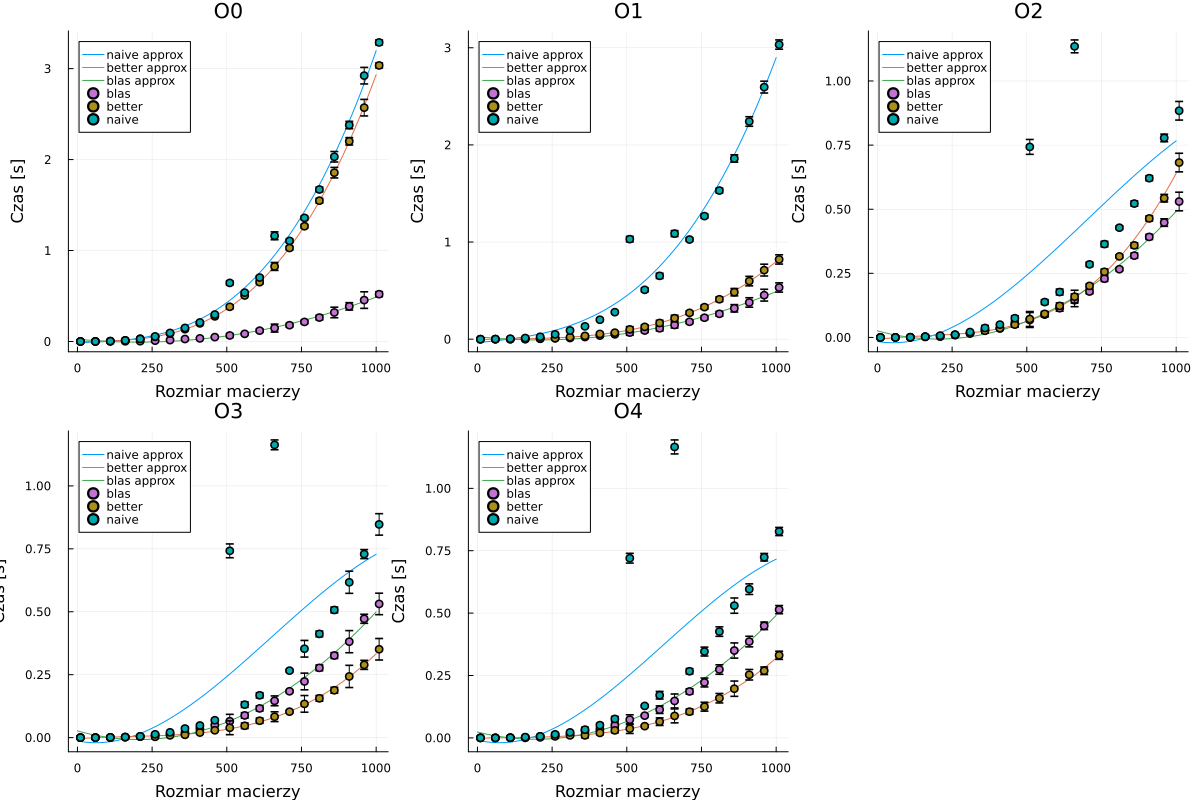

In [12]:
fit1 = fit(plot_dfO0.size, plot_dfO0.time_naive_mean, 3)
fit2 = fit(plot_dfO0.size, plot_dfO0.time_better_mean, 3)
fit3 = fit(plot_dfO0.size, plot_dfO0.time_blas_mean, 2)
xs = 0:1:1000
p0 = plot(fit1,extrema(xs)...,label="naive approx", xlabel = "Rozmiar macierzy", ylabel = "Czas [s]", legend = :topleft, title = "O0")
plot!(fit2,extrema(xs)...,label="better approx")
plot!(fit3,extrema(xs)...,label="blas approx")
scatter!(
    plot_dfO0.size, 
    plot_dfO0.time_blas_mean, 
    yerr = plot_dfO0.time_naive_std,
    label = "blas")
scatter!(
    plot_dfO0.size, 
    plot_dfO0.time_better_mean, 
    yerr = plot_dfO0.time_naive_std,
    label = "better")
scatter!(
    plot_dfO0.size, 
    plot_dfO0.time_naive_mean, 
    yerr = plot_dfO0.time_naive_std,
    label = "naive")
fit4 = fit(plot_dfO1.size, plot_dfO1.time_naive_mean, 3)
fit5 = fit(plot_dfO1.size, plot_dfO1.time_better_mean, 3)
fit6 = fit(plot_dfO1.size, plot_dfO1.time_blas_mean, 2)
p1 = plot(fit4,extrema(xs)...,label="naive approx", xlabel = "Rozmiar macierzy", ylabel = "Czas [s]", legend = :topleft, title = "O1")
plot!(fit5,extrema(xs)...,label="better approx")
plot!(fit6,extrema(xs)...,label="blas approx")
scatter!(
    plot_dfO1.size, 
    plot_dfO1.time_blas_mean, 
    yerr = plot_dfO1.time_naive_std,
    label = "blas")
scatter!(
    plot_dfO1.size, 
    plot_dfO1.time_better_mean, 
    yerr = plot_dfO1.time_naive_std,
    label = "better")
scatter!(
    plot_dfO1.size, 
    plot_dfO1.time_naive_mean, 
    yerr = plot_dfO1.time_naive_std,
    label = "naive")
fit7 = fit(plot_dfO2.size, plot_dfO2.time_naive_mean, 3)
fit8 = fit(plot_dfO2.size, plot_dfO2.time_better_mean, 3)
fit9 = fit(plot_dfO2.size, plot_dfO2.time_blas_mean, 2)
p2 = plot(fit7,extrema(xs)...,label="naive approx", xlabel = "Rozmiar macierzy", ylabel = "Czas [s]", legend = :topleft, title = "O2")
plot!(fit8,extrema(xs)...,label="better approx")
plot!(fit9,extrema(xs)...,label="blas approx")
scatter!(
    plot_dfO2.size, 
    plot_dfO2.time_blas_mean, 
    yerr = plot_dfO2.time_naive_std,
    label = "blas")
scatter!(
    plot_dfO2.size, 
    plot_dfO2.time_better_mean, 
    yerr = plot_dfO2.time_naive_std,
    label = "better")
scatter!(
    plot_dfO2.size, 
    plot_dfO2.time_naive_mean, 
    yerr = plot_dfO2.time_naive_std,
    label = "naive")
fit10 = fit(plot_dfO3.size, plot_dfO3.time_naive_mean, 3)
fit11 = fit(plot_dfO3.size, plot_dfO3.time_better_mean, 3)
fit12 = fit(plot_dfO3.size, plot_dfO3.time_blas_mean, 2)
p3 = plot(fit10,extrema(xs)...,label="naive approx", xlabel = "Rozmiar macierzy", ylabel = "Czas [s]", legend = :topleft, title = "O3")
plot!(fit11,extrema(xs)...,label="better approx")
plot!(fit12,extrema(xs)...,label="blas approx")
scatter!(
    plot_dfO3.size, 
    plot_dfO3.time_blas_mean, 
    yerr = plot_dfO3.time_naive_std,
    label = "blas")
scatter!(
    plot_dfO3.size, 
    plot_dfO3.time_better_mean, 
    yerr = plot_dfO3.time_naive_std,
    label = "better")
scatter!(
    plot_dfO3.size, 
    plot_dfO3.time_naive_mean, 
    yerr = plot_dfO3.time_naive_std,
    label = "naive")
fit13 = fit(plot_dfO4.size, plot_dfO4.time_naive_mean, 3)
fit14 = fit(plot_dfO4.size, plot_dfO4.time_better_mean, 3)
fit15 = fit(plot_dfO4.size, plot_dfO4.time_blas_mean, 2)
p4 = plot(fit13,extrema(xs)...,label="naive approx", xlabel = "Rozmiar macierzy", ylabel = "Czas [s]", legend = :topleft, title = "O4")
plot!(fit14,extrema(xs)...,label="better approx")
plot!(fit15,extrema(xs)...,label="blas approx")
scatter!(
    plot_dfO4.size, 
    plot_dfO4.time_blas_mean, 
    yerr = plot_dfO4.time_naive_std,
    label = "blas")
scatter!(
    plot_dfO4.size, 
    plot_dfO4.time_better_mean, 
    yerr = plot_dfO4.time_naive_std,
    label = "better")
scatter!(
    plot_dfO4.size, 
    plot_dfO4.time_naive_mean, 
    yerr = plot_dfO4.time_naive_std,
    label = "naive")

plot(p0, p1, p2, p3, p4, layout=(2,3), size = (1200, 800))

W powyższej analizie zauważyłem ciekawą anomalię, wszystkie optymalizacje (za wyjątkiem O0) dla macierzy o rozmiarze 510 oraz 660 wykazywały znacznie wyższy od oczekiwanego czas wykonania.

In [13]:
filter!(row -> row.size != 510 && row.size != 660, plot_dfO1)
filter!(row -> row.size != 510 && row.size != 660, plot_dfO2)
filter!(row -> row.size != 510 && row.size != 660, plot_dfO3)
filter!(row -> row.size != 510 && row.size != 660, plot_dfO4)

19×7 DataFrame
 Row │ size   time_naive_mean  time_naive_std  time_better_mean  time_better_s ⋯
     │ Int64  Float64          Float64         Float64           Float64       ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    10            0.0        0.0                    0.0        0.0       ⋯
   2 │    60            0.0        0.0                    0.0        0.0
   3 │   110            0.001      0.00316228             0.0        0.0
   4 │   160            0.003      0.00483046             0.0        0.0
   5 │   210            0.006      0.00516398             0.002      0.0042163 ⋯
   6 │   260            0.014      0.00699206             0.006      0.0051639
   7 │   310            0.022      0.00632456             0.01       0.0047140
   8 │   360            0.033      0.00948683             0.01       1.82856e-
   9 │   410            0.051      0.00737865             0.02       0.0081649 ⋯
  10 │   460            0.076      0.00966092             0.03       0.0081649
  11 │   560            0.128      0.00421637             0.047      0.0048304
  12 │   610            0.171      0.0152388              0.065      0.0097182
  13 │   710            0.267      0.0105935              0.105      0.0084983 ⋯
  14 │   760            0.346      0.0177639              0.125      0.0052704
  15 │   810            0.426      0.0189737              0.159      0.011005
  16 │   860            0.53       0.0305505              0.197      0.0141814
  17 │   910            0.596      0.021187               0.253      0.0286938 ⋯
  18 │   960            0.724      0.0150555              0.269      0.0119722
  19 │  1010            0.827      0.0163639              0.331      0.0213177
                                                               3 columns omitted

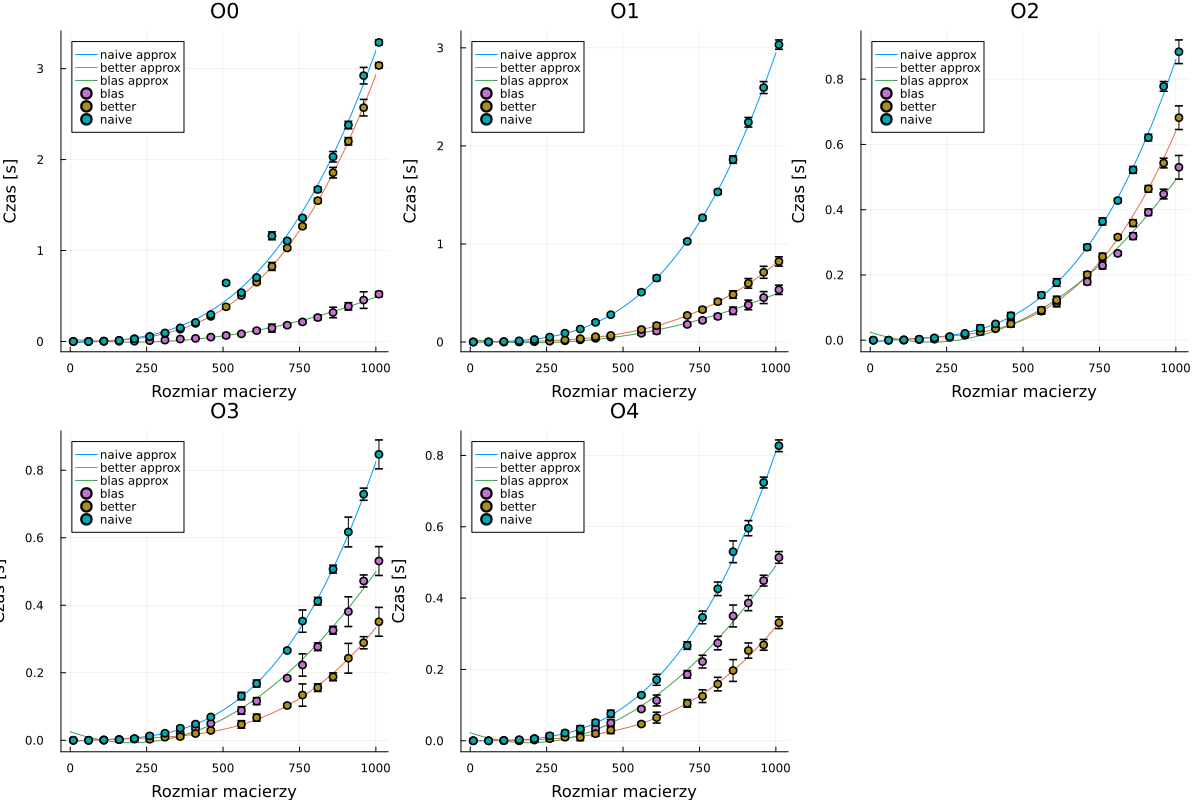

In [14]:
fit1 = fit(plot_dfO0.size, plot_dfO0.time_naive_mean, 3)
fit2 = fit(plot_dfO0.size, plot_dfO0.time_better_mean, 3)
fit3 = fit(plot_dfO0.size, plot_dfO0.time_blas_mean, 2)
xs = 0:1:1000
p0 = plot(fit1,extrema(xs)...,label="naive approx", xlabel = "Rozmiar macierzy", ylabel = "Czas [s]", legend = :topleft, title = "O0")
plot!(fit2,extrema(xs)...,label="better approx")
plot!(fit3,extrema(xs)...,label="blas approx")
scatter!(
    plot_dfO0.size, 
    plot_dfO0.time_blas_mean, 
    yerr = plot_dfO0.time_naive_std,
    label = "blas")
scatter!(
    plot_dfO0.size, 
    plot_dfO0.time_better_mean, 
    yerr = plot_dfO0.time_naive_std,
    label = "better")
scatter!(
    plot_dfO0.size, 
    plot_dfO0.time_naive_mean, 
    yerr = plot_dfO0.time_naive_std,
    label = "naive")
fit4 = fit(plot_dfO1.size, plot_dfO1.time_naive_mean, 3)
fit5 = fit(plot_dfO1.size, plot_dfO1.time_better_mean, 3)
fit6 = fit(plot_dfO1.size, plot_dfO1.time_blas_mean, 2)
p1 = plot(fit4,extrema(xs)...,label="naive approx", xlabel = "Rozmiar macierzy", ylabel = "Czas [s]", legend = :topleft, title = "O1")
plot!(fit5,extrema(xs)...,label="better approx")
plot!(fit6,extrema(xs)...,label="blas approx")
scatter!(
    plot_dfO1.size, 
    plot_dfO1.time_blas_mean, 
    yerr = plot_dfO1.time_naive_std,
    label = "blas")
scatter!(
    plot_dfO1.size, 
    plot_dfO1.time_better_mean, 
    yerr = plot_dfO1.time_naive_std,
    label = "better")
scatter!(
    plot_dfO1.size, 
    plot_dfO1.time_naive_mean, 
    yerr = plot_dfO1.time_naive_std,
    label = "naive")
fit7 = fit(plot_dfO2.size, plot_dfO2.time_naive_mean, 3)
fit8 = fit(plot_dfO2.size, plot_dfO2.time_better_mean, 3)
fit9 = fit(plot_dfO2.size, plot_dfO2.time_blas_mean, 2)
p2 = plot(fit7,extrema(xs)...,label="naive approx", xlabel = "Rozmiar macierzy", ylabel = "Czas [s]", legend = :topleft, title = "O2")
plot!(fit8,extrema(xs)...,label="better approx")
plot!(fit9,extrema(xs)...,label="blas approx")
scatter!(
    plot_dfO2.size, 
    plot_dfO2.time_blas_mean, 
    yerr = plot_dfO2.time_naive_std,
    label = "blas")
scatter!(
    plot_dfO2.size, 
    plot_dfO2.time_better_mean, 
    yerr = plot_dfO2.time_naive_std,
    label = "better")
scatter!(
    plot_dfO2.size, 
    plot_dfO2.time_naive_mean, 
    yerr = plot_dfO2.time_naive_std,
    label = "naive")
fit10 = fit(plot_dfO3.size, plot_dfO3.time_naive_mean, 3)
fit11 = fit(plot_dfO3.size, plot_dfO3.time_better_mean, 3)
fit12 = fit(plot_dfO3.size, plot_dfO3.time_blas_mean, 2)
p3 = plot(fit10,extrema(xs)...,label="naive approx", xlabel = "Rozmiar macierzy", ylabel = "Czas [s]", legend = :topleft, title = "O3")
plot!(fit11,extrema(xs)...,label="better approx")
plot!(fit12,extrema(xs)...,label="blas approx")
scatter!(
    plot_dfO3.size, 
    plot_dfO3.time_blas_mean, 
    yerr = plot_dfO3.time_naive_std,
    label = "blas")
scatter!(
    plot_dfO3.size, 
    plot_dfO3.time_better_mean, 
    yerr = plot_dfO3.time_naive_std,
    label = "better")
scatter!(
    plot_dfO3.size, 
    plot_dfO3.time_naive_mean, 
    yerr = plot_dfO3.time_naive_std,
    label = "naive")
fit13 = fit(plot_dfO4.size, plot_dfO4.time_naive_mean, 3)
fit14 = fit(plot_dfO4.size, plot_dfO4.time_better_mean, 3)
fit15 = fit(plot_dfO4.size, plot_dfO4.time_blas_mean, 2)
p4 = plot(fit13,extrema(xs)...,label="naive approx", xlabel = "Rozmiar macierzy", ylabel = "Czas [s]", legend = :topleft, title = "O4")
plot!(fit14,extrema(xs)...,label="better approx")
plot!(fit15,extrema(xs)...,label="blas approx")
scatter!(
    plot_dfO4.size, 
    plot_dfO4.time_blas_mean, 
    yerr = plot_dfO4.time_naive_std,
    label = "blas")
scatter!(
    plot_dfO4.size, 
    plot_dfO4.time_better_mean, 
    yerr = plot_dfO4.time_naive_std,
    label = "better")
scatter!(
    plot_dfO4.size, 
    plot_dfO4.time_naive_mean, 
    yerr = plot_dfO4.time_naive_std,
    label = "naive")

plot(p0, p1, p2, p3, p4, layout=(2,3), size = (1200, 800))

## Zadanie 4

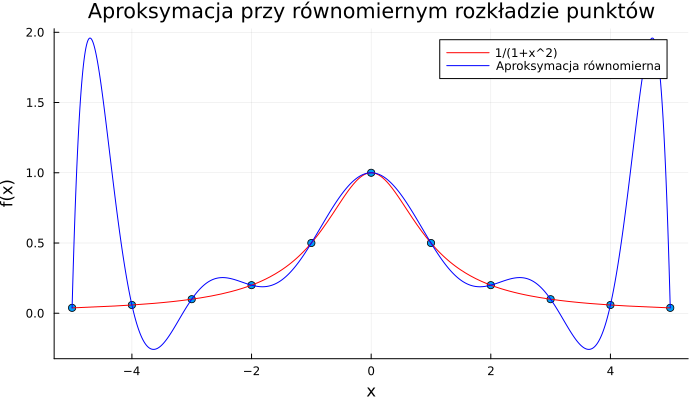

In [15]:
function target_function(x)
    1/(1 + x^2)
end

x_values = -5:1:5
y_values = [target_function(x) for x in x_values]
poly_approximation = fit(x_values, y_values, 10)

x_fine = -5:0.01:5
y_fine = [poly_approximation(x) for x in x_fine]

scatter(
    x_values,
    y_values,
    label=:none,
    size=(700,400),
    title="Aproksymacja przy równomiernym rozkładzie punktów",
    xlabel="x",
    ylabel="f(x)"
)

plot!(
    target_function,
    extrema(x_values)...,
    label="1/(1+x^2)",
    color=:red
)

plot!(
    x_fine,
    y_fine,
    label="Aproksymacja równomierna",
    color=:blue
)

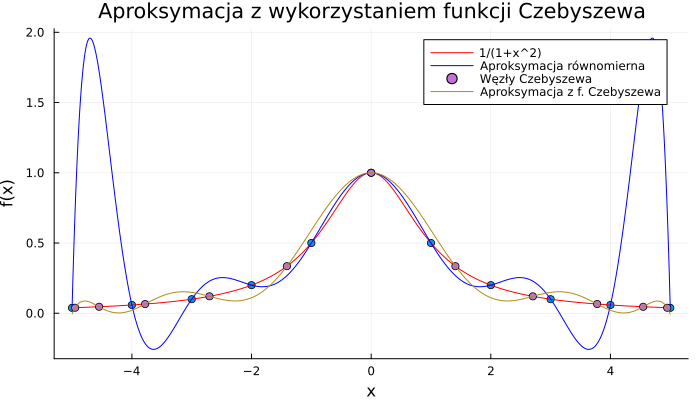

In [16]:
basis = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
chebyshev_poly = ChebyshevT(basis)
chebyshev_nodes = Polynomials.roots(chebyshev_poly)
chebyshev_nodes = 5 * chebyshev_nodes
y_chebyshev = [target_function(x) for x in chebyshev_nodes]

poly_approx_chebyshev = fit(chebyshev_nodes, y_chebyshev, 10)

scatter!(
    chebyshev_nodes,
    y_chebyshev,
    label="Węzły Czebyszewa",
    title="Aproksymacja z wykorzystaniem funkcji Czebyszewa"
)

y_fine_chebyshev = [poly_approx_chebyshev(x) for x in x_fine]
plot!(
    x_fine,
    y_fine_chebyshev,
    label="Aproksymacja z f. Czebyszewa",
)

## Zadanie 5

In [17]:
function_test(x) = log(1+x)/x

function_test (generic function with 1 method)

In [18]:
t = Taylor1(Float64, 5)
taylor_poly_base = function_test(t)

 1.0 - 0.5 t + 0.3333333333333333 t² - 0.25 t³ + 0.2 t⁴ + 𝒪(t⁵)

In [19]:
taylor_poly = Polynomial(taylor_poly_base.coeffs)

Polynomial(1.0 - 0.5*x + 0.3333333333333333*x^2 - 0.25*x^3 + 0.2*x^4)

In [20]:
pade_obj = Polynomials.PolyCompat.PadeApproximation.Pade(taylor_poly, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64, Float64}(Polynomial(1.0 + 0.6999999999999987*x + 0.03333333333333298*x^2), Polynomial(1.0 + 1.1999999999999986*x + 0.29999999999999905*x^2), :x)

In [21]:
pade_val(x) = pade_obj.p(x) / pade_obj.q(x)
taylor_val(x) = taylor_poly(x)

taylor_val (generic function with 1 method)

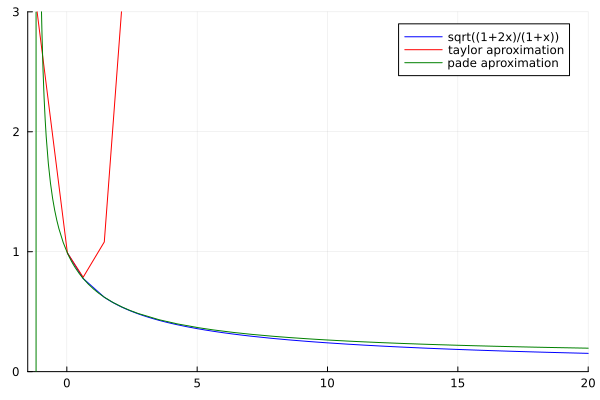

In [22]:
plot(function_test,
    xlims = (-1.5, 20),
    ylims = (0,3),
    label="sqrt((1+2x)/(1+x))",
    color = "blue"
)
plot!(taylor_val,
    label="taylor aproximation",
    color = "red"
)
plot!(pade_val,
    label="pade aproximation",
    color = "green"
)